<a href="https://colab.research.google.com/github/Yodit-Debebe/DBSCAN-clustering-algorithm/blob/main/DBSCAN_clustering_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as sch

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("Setup complete. RANDOM_STATE =", RANDOM_STATE)

Setup complete. RANDOM_STATE = 42


In [ ]:
# Dataset 1: Spherical blobs (good for K-Means)
X_blobs, _ = make_blobs(
    n_samples=600,
    centers=3,
    cluster_std=1.0,
    random_state=RANDOM_STATE
)

# Dataset 2: Anisotropic (stretched) blobs (hard for K-Means)
X_aniso, _ = make_blobs(
    n_samples=600,
    centers=3,
    cluster_std=1.0,
    random_state=RANDOM_STATE
)
transformation = np.array([[0.6, -0.6],
                           [0.4,  0.8]])
X_aniso = X_aniso @ transformation

# Dataset 3a: Moons (non-spherical)
X_moons, _ = make_moons(n_samples=600, noise=0.06, random_state=RANDOM_STATE)

# Dataset 3b: Circles (non-spherical)
X_circles, _ = make_circles(n_samples=600, noise=0.06, factor=0.5, random_state=RANDOM_STATE)

# Dataset 4: High-dimensional dataset for PCA
X_hd, y_hd = make_classification(
    n_samples=800,
    n_features=40,
    n_informative=10,
    n_redundant=10,
    n_classes=3,
    random_state=RANDOM_STATE
)

print("Shapes:")
print("X_blobs   :", X_blobs.shape)
print("X_aniso   :", X_aniso.shape)
print("X_moons   :", X_moons.shape)
print("X_circles :", X_circles.shape)
print("X_hd      :", X_hd.shape, "(labels y_hd:", y_hd.shape, ")")

Shapes:
X_blobs   : (600, 2)
X_aniso   : (600, 2)
X_moons   : (600, 2)
X_circles : (600, 2)
X_hd      : (800, 40) (labels y_hd: (800,) )


In [ ]:
def standardize(X):
    return StandardScaler().fit_transform(X)

def plot_clusters(X2d, labels, title="", centers=None):
    plt.figure(figsize=(7,5))
    labels = np.asarray(labels)
    unique_labels = np.unique(labels)

    for lab in unique_labels:
        mask = labels == lab
        if lab == -1:
            plt.scatter(X2d[mask, 0], X2d[mask, 1], s=22, marker='x', label="noise (-1)")
        else:
            plt.scatter(X2d[mask, 0], X2d[mask, 1], s=22, label=f"cluster {lab}")

    if centers is not None:
        plt.scatter(
            centers[:, 0],
            centers[:, 1],
            s=220,
            marker='*',
            edgecolor='k',
            label="centers"
        )

    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

def safe_silhouette(X, labels):
    labels = np.asarray(labels)
    unique = set(labels)

    if len(unique) <= 1:
        return None
    if unique == {-1}:
        return None

    non_noise = labels[labels != -1]
    if len(set(non_noise)) <= 1:
        return None

    return silhouette_score(X, labels)

print("Helpers ready.")


Helpers ready.


In [ ]:
X_blobs

array([[ 3.86608964,  0.72851498],
       [-6.5937618 , -6.5456528 ],
       [ 6.30535328,  2.98753975],
       ...,
       [-3.05358035,  9.12520872],
       [-6.22730431, -8.45650175],
       [-3.34841515,  8.70507375]])

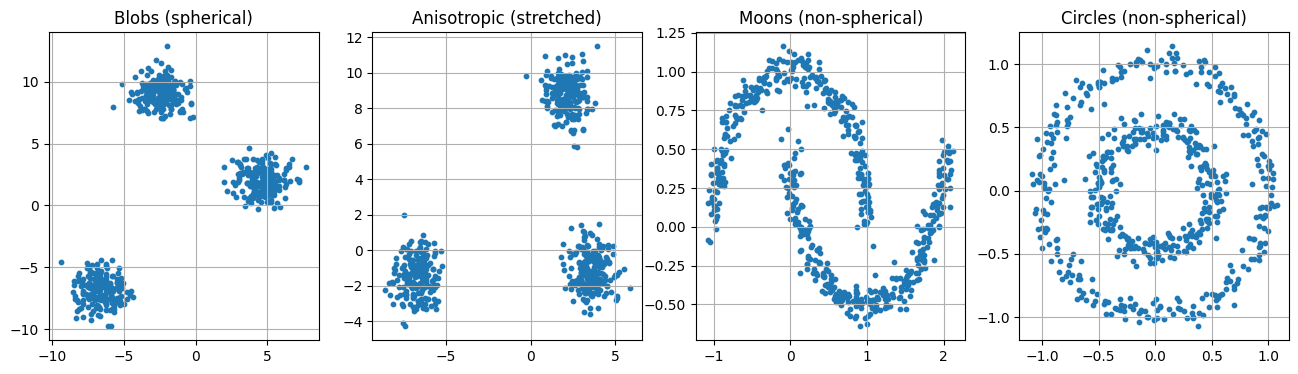

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(1,4,1)
plt.scatter(X_blobs[:,0], X_blobs[:,1], s=10)
plt.title("Blobs (spherical)")
plt.grid(True)

plt.subplot(1,4,2)
plt.scatter(X_aniso[:,0], X_aniso[:,1], s=10)
plt.title("Anisotropic (stretched)")
plt.grid(True)

plt.subplot(1,4,3)
plt.scatter(X_moons[:,0], X_moons[:,1], s=10)
plt.title("Moons (non-spherical)")
plt.grid(True)

plt.subplot(1,4,4)
plt.scatter(X_circles[:,0], X_circles[:,1], s=10)
plt.title("Circles (non-spherical)")
plt.grid(True)

plt.show()

=========================================================
## **DBSCAN Clustering**
=========================================================

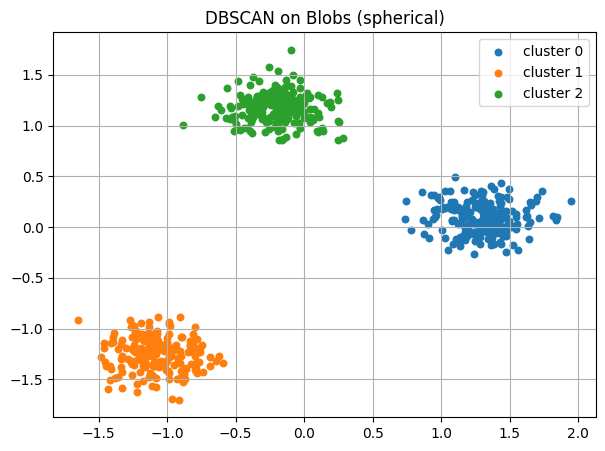

Silhouette (blobs): 0.8434665037838329


In [ ]:
X = standardize(X_blobs)

dbscan_blobs = DBSCAN(eps=0.3, min_samples=5)
labels_blobs = dbscan_blobs.fit_predict(X)

plot_clusters(
    X,
    labels_blobs,
    title="DBSCAN on Blobs (spherical)"
)

print("Silhouette (blobs):", safe_silhouette(X, labels_blobs))


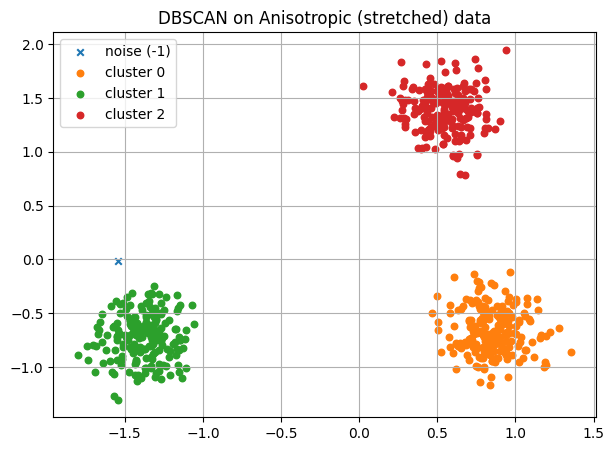

Silhouette (aniso): 0.7380431431357987


In [ ]:
X = standardize(X_aniso)

dbscan_aniso = DBSCAN(eps=0.3, min_samples=5)
labels_aniso = dbscan_aniso.fit_predict(X)

plot_clusters(
    X,
    labels_aniso,
    title="DBSCAN on Anisotropic (stretched) data"
)

print("Silhouette (aniso):", safe_silhouette(X, labels_aniso))


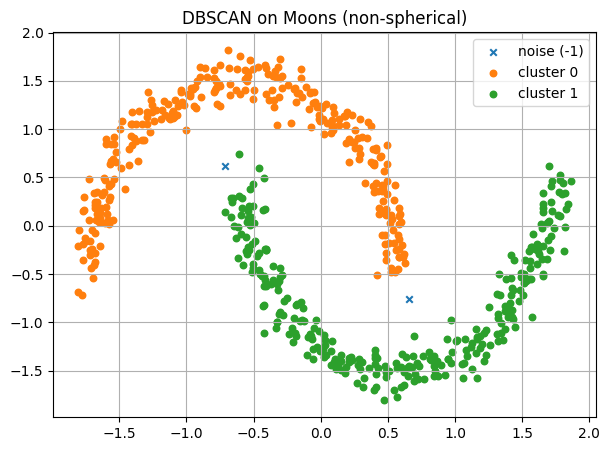

Silhouette (moons): 0.152960549893669


In [ ]:
X = standardize(X_moons)

dbscan_moons = DBSCAN(eps=0.25, min_samples=5)
labels_moons = dbscan_moons.fit_predict(X)

plot_clusters(
    X,
    labels_moons,
    title="DBSCAN on Moons (non-spherical)"
)

print("Silhouette (moons):", safe_silhouette(X, labels_moons))


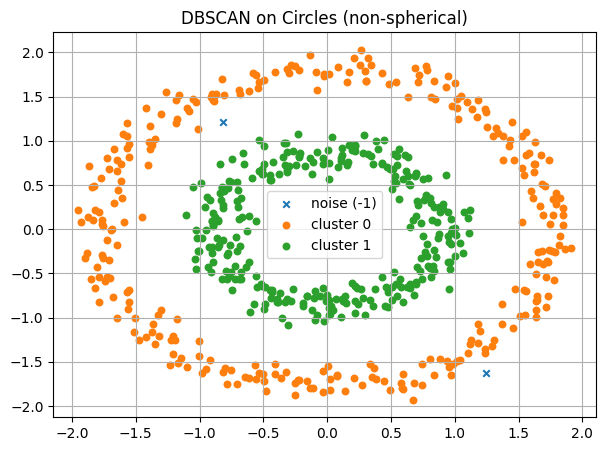

Silhouette (circles): 0.10253609651791605


In [ ]:
X = standardize(X_circles)

dbscan_circles = DBSCAN(eps=0.2, min_samples=5)
labels_circles = dbscan_circles.fit_predict(X)

plot_clusters(
    X,
    labels_circles,
    title="DBSCAN on Circles (non-spherical)"
)

print("Silhouette (circles):", safe_silhouette(X, labels_circles))


DBSCAN + PCA on High-Dimensional **Data**

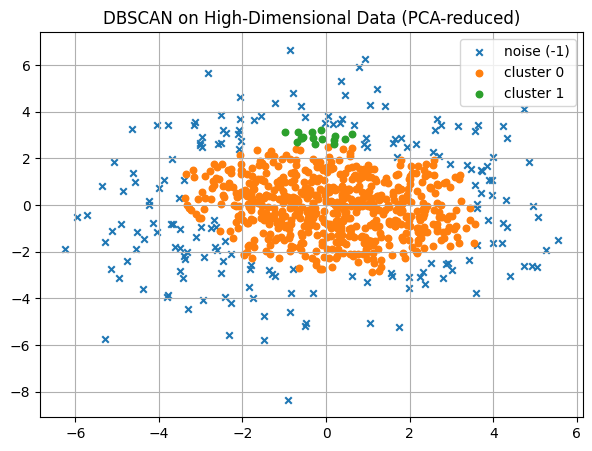

Silhouette (HD + PCA): 0.10343048029511774


In [ ]:
X = standardize(X_hd)

pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)

dbscan_hd = DBSCAN(eps=0.5, min_samples=10)
labels_hd = dbscan_hd.fit_predict(X_pca)

plot_clusters(
    X_pca,
    labels_hd,
    title="DBSCAN on High-Dimensional Data (PCA-reduced)"
)

print("Silhouette (HD + PCA):", safe_silhouette(X_pca, labels_hd))
